# Task 04 - Stock Market Prediction using Numerical and Textual Analysis

# By Gaurav Wankhede

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv("C:/Users/DELL/Desktop/india-news-headlines.csv")

In [3]:
df1.head(10)

publish_date headline_category  \
0      20010101        sports.wwe   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   
5      20010102           unknown   
6      20010102           unknown   
7      20010102           unknown   
8      20010102           unknown   
9      20010102           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa  
5               Extra buses to clear tourist traffic  
6        Dilute the power of transfers; says Riberio  
7                  Focus shifts to teaching of Hindi  
8               IT will become compulsory in schools  
9      Move to stop freedom fighters' pension flayed

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1048575 non-null  int64 
 1   headline_category  1048575 non-null  object
 2   headline_text      1048575 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [5]:
df1.value_counts()

publish_date  headline_category  headline_text                                                        
20090408      unknown            Youngest user of fairness creams is just 12                              25
                                 Sensex slips 363 pts in early trade                                      24
              removed            Youngest user of fairness creams                                         22
20070321      removed            Team India's Twenty20 initiation today                                   22
20070712      unknown            Check your Potter Quotient                                               17
                                                                                                          ..
20090309      city.kanpur        ISO certification for Dufferin Hospital mooted                            1
                                 Hindu & Muslim bonding comes to fore                                      1
                         

In [6]:
df1.shape

(1048575, 3)

In [7]:
# Textual data as csv

In [8]:
df2=pd.read_csv("C:/Users/DELL/Desktop/DJIA.csv")

In [9]:
df2.head()

Date  Label                                               Top1  \
0  08-08-2008      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  11-08-2008      1  b'Why wont America and Nato help us? If they w...   
2  12-08-2008      0  b'Remember that adorable 9-year-old who sang a...   
3  13-08-2008      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  14-08-2008      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   
3                      b'Elephants extinct by 2020?'   
4  b'Bank analyst forecast Georgian crisis 2 days...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufac

In [10]:
# NUmerical data as csv

In [11]:
df3=pd.read_csv("C:/Users/DELL/Desktop/DJIA_table.csv")

In [12]:
df3.head()

Date         Open         High          Low        Close     Volume  \
0  01-07-2016  17924.24023  18002.38086  17916.91016  17949.36914   82160000   
1  30-06-2016  17712.75977  17930.60938  17711.80078  17929.99023  133030000   
2  29-06-2016  17456.01953  17704.50977  17456.01953  17694.67969  106380000   
3  28-06-2016  17190.50977  17409.72070  17190.50977  17409.72070  112190000   
4  27-06-2016  17355.21094  17355.21094  17063.08008  17140.24023  138740000   

     Adj Close  
0  17949.36914  
1  17929.99023  
2  17694.67969  
3  17409.72070  
4  17140.24023

# from 1 to 25 we will combine them into one 

In [13]:
#Combine the top news headlines
headlines = []
for row in range(0,len(df2.index)):
    headlines.append(' '.join(str(x) for x in df2.iloc[row,2:27]))

In [14]:
headlines[1]

'b\'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?\' b\'Bush puts foot down on Georgian conflict\' b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia " b\'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired\' b"Olympic opening ceremony fireworks \'faked\'" b\'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?\' b\'Russia angered by Israeli military sale to Georgia\' b\'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people\' b\'Welcome To World War IV! Now In High Definition!\' b"Georgia\'s move, a mistake of monumental proportions " b\'Russia presses deeper into Georgia; U.S. says regime change is goal\' b\'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India\' b\' U.S. ship heads for Arctic to define territory\' b\'Drivers in a Jerusalem taxi station threaten to quit ra

# We will clean the combined headline

In [15]:
import re
#Clean the data
clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [16]:
clean_headlines[1]

'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq? Bush puts foot down on Georgian conflict Jewish Georgian minister: Thanks to Israeli training, were fending off Russia " Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired Olympic opening ceremony fireworks faked" What were the Mossad with fraudulent New Zealand Passports doing in Iraq? Russia angered by Israeli military sale to Georgia An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people Welcome To World War IV! Now In High Definition! Georgias move, a mistake of monumental proportions " Russia presses deeper into Georgia; U.S. says regime change is goal Abhinav Bindra wins first ever Individual Olympic Gold Medal for India  U.S. ship heads for Arctic to define territory Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Ara The French Team is Stunn

In [17]:
#Add the clean headlines to the data set
df2['Combined_News'] = clean_headlines

In [18]:
df2.head()

Date  Label                                               Top1  \
0  08-08-2008      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  11-08-2008      1  b'Why wont America and Nato help us? If they w...   
2  12-08-2008      0  b'Remember that adorable 9-year-old who sang a...   
3  13-08-2008      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  14-08-2008      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufacturer'   
2         b'Russia, Georgia, and NATO: Cold War Two'   
3  b'Russian convoy heads into Georgia, violating...   
4  b'"Non-media" photos of South Ossetia/Georgia ...   

                                               Top20  \
0  b"Georgia will withdraw 1,000 soldiers from Ir...   
1                     b'War in South Ossetia [

In [19]:
df2['Combined_News'].head(5)

0    Georgia downs two Russian warplanes as countri...
1    Why wont America and Nato help us? If they won...
2    Remember that adorable 9-year-old who sang at ...
3     U.S. refuses Israel weapons to attack Iran: r...
4    All the experts admit that we should legalise ...
Name: Combined_News, dtype: object

In [20]:
print(df2.columns)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Combined_News'],
      dtype='object')


In [21]:
# Checking for null values
df2.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

In [22]:
all_headlines = ' '.join(df2['Combined_News'].str.lower())

In [23]:
all_headlines

'georgia downs two russian warplanes as countries move to brink of war" breaking: musharraf to be impeached. russia today: columns of troops roll into south ossetia; footage from fighting (youtube) russian tanks are moving towards the capital of south ossetia, which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity, u.n. official says - this is sick, a three year old was raped and they do nothing" 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets. breaking: georgia invades south ossetia, russia warned it would intervene on sos side" the enemy combatent trials are nothing but a sham: salim haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." georgian troops retreat from s. osettain capital, presumably leaving several hundred people killed. [video] did the u.s. prep georgia for war with russia? rice gives green light for israel to attack iran: s

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(all_headlines)

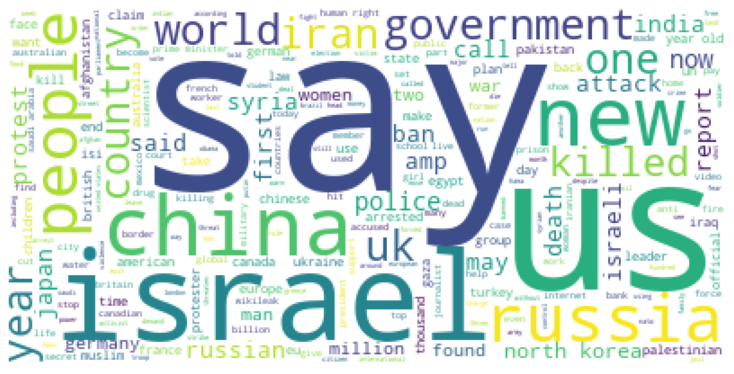

In [25]:
plt.figure(figsize = (10, 20)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

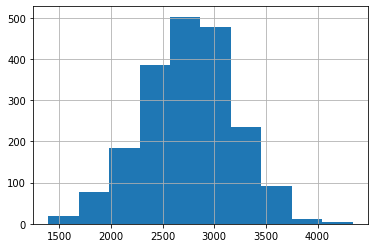

<Figure size 432x288 with 0 Axes>

In [26]:
df2['Combined_News'].str.len().hist()
plt.figure(figsize=(6,4))
plt.show()

In [27]:
df3.head()

Date         Open         High          Low        Close     Volume  \
0  01-07-2016  17924.24023  18002.38086  17916.91016  17949.36914   82160000   
1  30-06-2016  17712.75977  17930.60938  17711.80078  17929.99023  133030000   
2  29-06-2016  17456.01953  17704.50977  17456.01953  17694.67969  106380000   
3  28-06-2016  17190.50977  17409.72070  17190.50977  17409.72070  112190000   
4  27-06-2016  17355.21094  17355.21094  17063.08008  17140.24023  138740000   

     Adj Close  
0  17949.36914  
1  17929.99023  
2  17694.67969  
3  17409.72070  
4  17140.24023

In [28]:
df3.describe()

Open          High           Low         Close        Volume  \
count   1989.000000   1989.000000   1989.000000   1989.000000  1.989000e+03   
mean   13459.116049  13541.303173  13372.931728  13463.032255  1.628110e+08   
std     3143.281634   3136.271725   3150.420934   3144.006996  9.392343e+07   
min     6547.009766   6709.609863   6469.950195   6547.049805  8.410000e+06   
25%    10907.339840  11000.980470  10824.759770  10913.379880  1.000000e+08   
50%    13022.049810  13088.110350  12953.129880  13025.580080  1.351700e+08   
75%    16477.699220  16550.070310  16392.769530  16478.410160  1.926000e+08   
max    18315.060550  18351.359380  18272.560550  18312.390630  6.749200e+08   

          Adj Close  
count   1989.000000  
mean   13463.032255  
std     3144.006996  
min     6547.049805  
25%    10913.379880  
50%    13025.580080  
75%    16478.410160  
max    18312.390630

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [30]:
#Checking for null values
df3.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

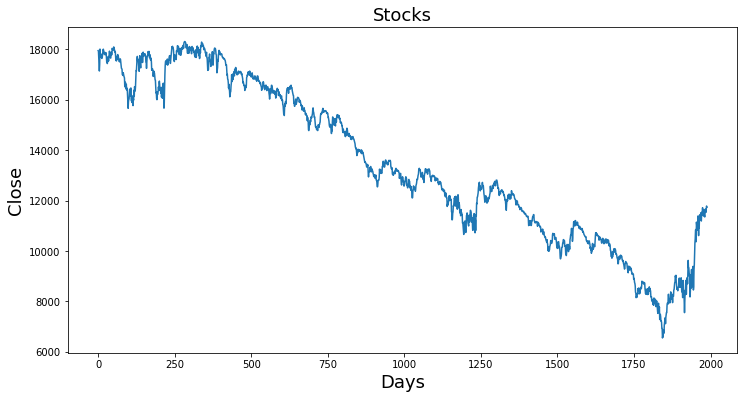

In [31]:
# Visualizing of the dataset
plt.figure(figsize=(12,6))
plt.title('Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(df3['Close'])
plt.show()

In [32]:
# Splitting data into train and valid
train = df3[:700]
valid = df3[700:]

In [33]:
training = train['Close']
validation = valid['Close']

In [34]:
training.head()

0    17949.36914
1    17929.99023
2    17694.67969
3    17409.72070
4    17140.24023
Name: Close, dtype: float64

In [35]:
# Import the libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
#Merge the data set on the date field
merge_data = df2.merge(df3, how='inner', on= 'Date', left_index = True)
#Show the merged data set
merge_data.head(3)

Date  Label                                               Top1  \
1988  08-08-2008      0  b"Georgia 'downs two Russian warplanes' as cou...   
1987  11-08-2008      1  b'Why wont America and Nato help us? If they w...   
1986  12-08-2008      0  b'Remember that adorable 9-year-old who sang a...   

                                             Top2  \
1988      b'BREAKING: Musharraf to be impeached.'   
1987  b'Bush puts foot down on Georgian conflict'   
1986           b"Russia 'ends Georgia operation'"   

                                                   Top3  \
1988  b'Russia Today: Columns of troops roll into So...   
1987  b"Jewish Georgian minister: Thanks to Israeli ...   
1986  b'"If we had no sexual harassment we would hav...   

                                                   Top4  \
1988  b'Russian tanks are moving towards the capital...   
1987  b'Georgian army flees in disarray as Russians ...   
1986  b"Al-Qa'eda is losing support in Iraq because ...   

                                                   Top5  \
1988  b"Afghan children raped with 'impunity,' U.N. ...   
1987      b"Olympic opening ceremony fireworks 'faked'"   
1986  b'Ceasefire in Georgia: Putin Outmaneuvers the...   

                                                   Top6  \
1988  b'150 Russian tanks have entered South Ossetia...   
1987  b'What were the Mossad with fraudulent New Zea...   
1986  b'Why Microsoft and Intel tried to kill the XO...   

                                                   Top7  \
1988  b"Breaking: Georgia invades South Ossetia, Rus...   
1987  b'Russia angered by Israeli military sale to G...   
1986  b'Stratfor: The Russo-Georgian War and the Bal...   

                                                   Top8  ...  \
1988  b"The 'enemy combatent' trials are nothing but...  ...   
1987  b'An American citizen living in S.Ossetia blam...  ...   
1986  b"I'm Trying to Get a Sense of This Whole Geor...  ...   

                                                  Top23  \
1988  b'Indian shoe manufactory  - And again in a se...   
1987  b'Perhaps *the* question about the Georgia - R...   
1986  b'Christopher King argues that the US and NATO...   

                                                  Top24  \
1988  b'Visitors Suffering from Mental Illnesses Ban...   
1987                 b'Russia is so much better at war'   
1986                        b'America: The New Mexico?'   

                                                  Top25  \
1988           b"No Help for Mexico's Kidnapping Surge"   
1987  b"So this is what it's come to: trading sex fo...   
1986  b"BBC NEWS | Asia-Pacific | Extinction 'by man...   

                                          Combined_News         Open  \
1988  Georgia downs two Russian warplanes as countri...  11432.08984   
1987  Why wont America and Nato help us? If they won...  11729.66992   
1986  Remember that adorable 9-year-old who sang at ...  11781.70020   

             High          Low        Close     Volume    Adj Close  
1988  11759.95996  11388.04004  11734.32031  212830000  11734.32031  
1987  11867.11035  11675.53027  11782.34961  183190000  11782.34961  
1986  11782.34961  11601.51953  11642.46973  173590000  11642.46973  

[3 rows x 34 columns]

In [37]:
merge_data.fillna(0, inplace=True)  

 #Resting index after merge
merge_data.reset_index(inplace = True,drop=True) #Resting index after merge


In [38]:
merge_data.shape

(1989, 34)

In [39]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [40]:
merge_data['Subjectivity'] = merge_data['Combined_News'].apply(getSubjectivity)
merge_data['Polarity'] = merge_data['Combined_News'].apply(getPolarity)

In [41]:
merge_data.head(5)

Date  Label                                               Top1  \
0  08-08-2008      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  11-08-2008      1  b'Why wont America and Nato help us? If they w...   
2  12-08-2008      0  b'Remember that adorable 9-year-old who sang a...   
3  13-08-2008      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  14-08-2008      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top25  \
0           b"No Help for Mexico's Kidnapping Surge"   
1  b"So this is what it's come to: trading sex fo...   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...   
3  b'2006: Nobel laureate Aleksander Solzhenitsyn...   
4  b'Philippines : Peace Advocate say Muslims nee...   

                                       Combined_News         Open  \
0  Georgia downs two Russian warplanes as countri...  11432.08984   
1  Why wont America and Nato help us? If they won...  11729.66992   
2  Remember that adorable 9-year-old who sang at ...  11781.70020   
3   U.S. refuses Israel weapons to attack Iran: r...  11632.80957   
4  All the experts admit that we should legalise ...  11532.07031   

          High          Low        Close     Volume    Adj Close Subjectivity  \
0  11759.95996  11388.04004  11734.32031  212830000  11734.32031     0.267549   
1  11867.11035  11675.53027  11782.34961  183190000  11782.34961     0.374806   
2  11782.34961  11601.51953  11642.46973  173590000  11642.46973     0.536234   
3  11633.78027  11453.33984  11532.95996  182550000  11532.95996     0.364021   
4  11718.280

In [42]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [43]:
# Get the sentiment scores for each day
compound = []
neg = []
neu = []
pos = []
SIA = []
for i in range(0, len(merge_data['Combined_News'])):
    SIA = getSIA(merge_data['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [44]:
# Store the sentiment scores in the data frame
merge_data['Compound'] = compound
merge_data['Negative'] = neg
merge_data['Neutral'] = neu
merge_data['Positive'] = pos

In [45]:
merge_data.head(5)

Date  Label                                               Top1  \
0  08-08-2008      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  11-08-2008      1  b'Why wont America and Nato help us? If they w...   
2  12-08-2008      0  b'Remember that adorable 9-year-old who sang a...   
3  13-08-2008      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  14-08-2008      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...          Low  \
0  b"The 'enemy combatent' trials are nothing but...  ...  11388.04004   
1  b'An American citizen living in S.Ossetia blam...  ...  11675.53027   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...  11601.51953   
3             b'Russian forces sink Georgian ships '  ...  11453.33984   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...  11450.88965   

         Close     Volume    Adj Close Subjectivity  Polarity Compound  \
0  11734.32031  212830000  11734.32031     0.267549 -0.048568  -0.9982   
1  11782.34961  183190000  11782.34961     0.374806  0.121956  -0.9858   
2  11642.46973  173590000  11642.46973     0.536234 -0.044302  -0.9715   
3  11532.95996  182550000  11532.95996     0.364021  0.011398  -0.9809   
4  11615.92969  159790000  11615.92969     0.375099  0.040677  -0.9882   

  Negative Neutral Positive  
0    0.235   0.724    0.041  
1    0.191   0.721    0.089  
2    0.128   0.816    0.056  
3    0.146   0.788    0.066  
4    0.189   0.717    0.094  

[5 rows x 40 columns]

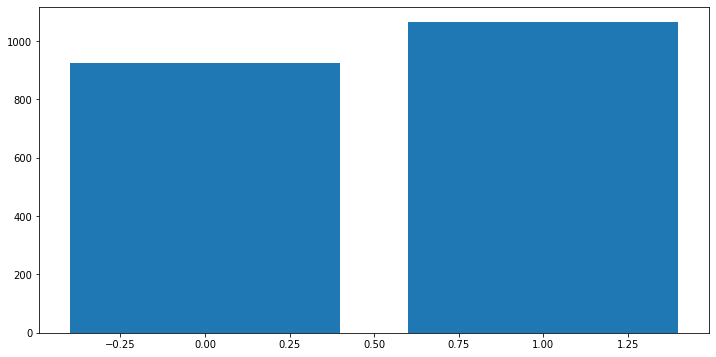

In [46]:
# Visualizing label column by using the dataset
plt.figure(figsize=(12,6))
plt.bar(merge_data.Label.value_counts().index,
        merge_data.Label.value_counts())
plt.show()

In [47]:
#Create a list of columns to keep
keep_columns = [ 'Open',  'High', 'Low','Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive','Label']
df = merge_data[keep_columns]
df.head()

Open         High          Low     Volume  Subjectivity  Polarity  \
0  11432.08984  11759.95996  11388.04004  212830000      0.267549 -0.048568   
1  11729.66992  11867.11035  11675.53027  183190000      0.374806  0.121956   
2  11781.70020  11782.34961  11601.51953  173590000      0.536234 -0.044302   
3  11632.80957  11633.78027  11453.33984  182550000      0.364021  0.011398   
4  11532.07031  11718.28027  11450.88965  159790000      0.375099  0.040677   

   Compound  Negative  Neutral  Positive  Label  
0   -0.9982     0.235    0.724     0.041      0  
1   -0.9858     0.191    0.721     0.089      1  
2   -0.9715     0.128    0.816     0.056      0  
3   -0.9809     0.146    0.788     0.066      0  
4   -0.9882     0.189    0.717     0.094      1

In [48]:
# Splitting data into training and testing dataset
# Create the feature data set

X =df.drop('Label', axis=1)
#Create the target data set
y =df['Label']

In [49]:
y.value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [50]:
X.shape

(1989, 10)

In [51]:
y.shape

(1989,)

In [52]:
X.head()

Open         High          Low     Volume  Subjectivity  Polarity  \
0  11432.08984  11759.95996  11388.04004  212830000      0.267549 -0.048568   
1  11729.66992  11867.11035  11675.53027  183190000      0.374806  0.121956   
2  11781.70020  11782.34961  11601.51953  173590000      0.536234 -0.044302   
3  11632.80957  11633.78027  11453.33984  182550000      0.364021  0.011398   
4  11532.07031  11718.28027  11450.88965  159790000      0.375099  0.040677   

   Compound  Negative  Neutral  Positive  
0   -0.9982     0.235    0.724     0.041  
1   -0.9858     0.191    0.721     0.089  
2   -0.9715     0.128    0.816     0.056  
3   -0.9809     0.146    0.788     0.066  
4   -0.9882     0.189    0.717     0.094

In [53]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0,stratify=y)

In [56]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=3,class_weight='balanced')
svclassifier.fit(x_train, y_train)

SVC(class_weight='balanced', kernel='poly')

In [57]:
y_pred = svclassifier.predict(x_test)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))
print(svclassifier.score(x_test, y_test)*100,"%")

[[  3 182]
 [  4 209]]
              precision    recall  f1-score   support

           0       0.43      0.02      0.03       185
           1       0.53      0.98      0.69       213

    accuracy                           0.53       398
   macro avg       0.48      0.50      0.36       398
weighted avg       0.49      0.53      0.38       398

53.266331658291456 %


In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(x_train, y_train)

In [60]:
print(rfc.score(x_test, y_test)*100,"%")

56.28140703517588 %


In [61]:
rfc_prediction = rfc.predict(x_test)
rfc_prediction

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,

In [62]:
y_test

972     0
1013    0
1921    1
402     1
256     0
       ..
1096    0
187     0
1254    1
1308    1
1311    0
Name: Label, Length: 398, dtype: int64

In [63]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48       185
           1       0.58      0.67      0.62       213

    accuracy                           0.56       398
   macro avg       0.56      0.55      0.55       398
weighted avg       0.56      0.56      0.56       398



In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis().fit(x_train, y_train)
LDA
print(LDA.score(x_test, y_test)*100,"%")

84.92462311557789 %


In [66]:
predictions = LDA.predict(x_test)
predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       185
           1       0.86      0.85      0.86       213

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



In [68]:
print('SVM :',svclassifier.score(x_test, y_test)*100,"%")
print('Random Forest :',rfc.score(x_test, y_test)*100,"%")
print('Linear Discriminant :',LDA.score(x_test, y_test)*100,"%")

SVM : 53.266331658291456 %
Random Forest : 56.28140703517588 %
Linear Discriminant : 84.92462311557789 %
